In [138]:
import pandas as pd
import numpy as np
% pylab inline  
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

Populating the interactive namespace from numpy and matplotlib


C:\Users\Akhand\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:161: UserWarning: pylab import has clobbered these variables: ['test']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [139]:
# load the data
train = pd.read_csv('B:/Case studies/Chennai Estate/train.csv')
test = pd.read_csv('B:/Case studies/Chennai Estate/test.csv')

In [140]:
train.head(10)

,PRT_ID,AREA,INT_SQFT,Rs Per sq,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,...,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE,Unnamed: 23
0,P03210,Karapakkam,1004,7569.721116,04/05/2011,131,1.0,1.0,3,AbNormal,...,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000,NaN
1,P09411,Anna Nagar,1986,10935.433030,19/12/2006,26,2.0,1.0,5,AbNormal,...,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770,NaN
2,P01812,Adyar,909,14476.567660,04/02/2012,70,1.0,1.0,3,AbNormal,...,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200,NaN
3,P05346,Velachery,1855,5191.530997,13/03/2010,14,3.0,2.0,5,Family,...,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290,NaN
4,P06210,Karapakkam,1226,6040.986949,05/10/2009,84,1.0,1.0,3,AbNormal,...,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250,NaN
5,P00219,Chrompet,1220,10159.631150,11/09/2014,36,2.0,1.0,4,Partial,...,No Access,RH,4.5,2.6,3.1,3.320,409027,198316,12394750,NaN
6,P09105,Chrompet,1167,7274.027421,05/04/2007,137,1.0,1.0,3,Partial,...,No Access,RL,3.6,2.1,2.5,2.670,263152,33955,8488790,NaN
7,P09679,Velachery,1847,9095.966432,13/03/2006,176,3.0,2.0,5,Family,...,Gravel,RM,2.4,4.5,2.1,3.260,604809,235204,16800250,NaN
8,P03377,Chrompet,771,10776.874190,06/04/2011,175,1.0,1.0,2,AdjLand,...,Paved,RM,2.9,3.7,4.0,3.550,257578,33236,8308970,NaN
9,P09623,Velachery,1635,4944.128440,22/06/2006,74,2.0,1.0,4,AbNormal,...,No Access,I,3.1,3.1,3.3,3.160,323346,121255,8083650,NaN


In [141]:
test.head(10)

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS
0,P05996,Chrompet,958,13/11/2009,185,1,1,3,AbNormal,No,...,Others,NoSewr,Paved,RH,3.1,4.4,3.9,3.860,203260,93813
1,P09294,Anna Nagar,1807,29/01/2007,108,2,1,5,AdjLand,Yes,...,Others,NoSeWa,No Access,RM,2.6,4.1,2.1,2.775,370410,222246
2,P03807,Karapakkam,1658,07/01/2011,59,2,2,4,AdjLand,No,...,Others,NoSeWa,Paved,I,2.5,2.3,3.2,2.720,387972,113159
3,P00539,Anna Nagar,1592,22/01/2014,102,1,1,4,AbNormal,Yes,...,Others,AllPub,Gravel,RL,4.1,4.8,2.5,3.635,408134,84442
4,P01448,Chrompet,857,01/05/2012,62,1,1,3,Family,No,...,House,ELO,Gravel,RH,3.0,4.5,2.9,3.570,181212,34849
5,P06667,KK Nagar,1818,30/06/2009,12,3,2,5,Partial,No,...,Commercial,NoSeWa,Paved,RH,2.6,2.6,2.0,2.360,472463,305712
6,P09803,Velachery,1584,12/06/2005,186,2,1,4,Normal Sale,Yes,...,Commercial,NoSeWa,Paved,RM,3.6,3.9,2.4,3.380,533096,103657
7,P05568,Anna Nagar,1860,02/02/2010,59,2,1,5,Normal Sale,Yes,...,Commercial,ELO,Gravel,RL,3.5,4.0,2.0,3.025,849269,304866
8,P05102,Velachery,1701,01/05/2010,16,2,1,4,Family,No,...,Commercial,ELO,Gravel,RM,3.0,2.0,3.5,2.700,447233,238524
9,P04556,Adyar,868,09/08/2010,182,1,1,3,Normal Sale,No,...,House,NoSeWa,Paved,A,3.3,3.9,4.1,3.820,186898,5664


In [142]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 24 columns):
PRT_ID           7109 non-null object
AREA             7109 non-null object
INT_SQFT         7109 non-null int64
Rs Per sq        7109 non-null float64
DATE_SALE        7109 non-null object
DIST_MAINROAD    7109 non-null int64
N_BEDROOM        7108 non-null float64
N_BATHROOM       7104 non-null float64
N_ROOM           7109 non-null int64
SALE_COND        7109 non-null object
PARK_FACIL       7109 non-null object
DATE_BUILD       7109 non-null object
BUILDTYPE        7109 non-null object
UTILITY_AVAIL    7109 non-null object
STREET           7109 non-null object
MZZONE           7109 non-null object
QS_ROOMS         7109 non-null float64
QS_BATHROOM      7109 non-null float64
QS_BEDROOM       7109 non-null float64
QS_OVERALL       7109 non-null float64
REG_FEE          7109 non-null int64
COMMIS           7109 non-null int64
SALES_PRICE      7109 non-null int64
Unnamed: 23      0

In [143]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2925 entries, 0 to 2924
Data columns (total 21 columns):
PRT_ID           2925 non-null object
AREA             2925 non-null object
INT_SQFT         2925 non-null int64
DATE_SALE        2925 non-null object
DIST_MAINROAD    2925 non-null int64
N_BEDROOM        2925 non-null int64
N_BATHROOM       2925 non-null int64
N_ROOM           2925 non-null int64
SALE_COND        2925 non-null object
PARK_FACIL       2925 non-null object
DATE_BUILD       2925 non-null object
BUILDTYPE        2925 non-null object
UTILITY_AVAIL    2925 non-null object
STREET           2925 non-null object
MZZONE           2925 non-null object
QS_ROOMS         2925 non-null float64
QS_BATHROOM      2925 non-null float64
QS_BEDROOM       2925 non-null float64
QS_OVERALL       2925 non-null float64
REG_FEE          2925 non-null int64
COMMIS           2925 non-null int64
dtypes: float64(4), int64(7), object(10)
memory usage: 480.0+ KB


In [145]:
# Correlations between features
train.corr()

,INT_SQFT,Rs Per sq,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE,Unnamed: 23
INT_SQFT,1.000000,-0.444850,0.002022,0.786348,0.515390,0.951279,0.019850,-0.008337,0.008865,0.012413,0.657544,0.571076,0.612125,NaN
Rs Per sq,-0.444850,1.000000,0.015667,-0.441518,-0.385632,-0.394648,0.004032,-0.003860,0.011989,0.009483,0.205473,0.028222,0.388149,NaN
DIST_MAINROAD,0.002022,0.015667,1.000000,-0.002566,0.001970,0.002301,0.002237,-0.029468,0.001554,-0.016672,0.011600,0.010994,0.018783,NaN
N_BEDROOM,0.786348,-0.441518,-0.002566,1.000000,0.755214,0.840286,0.015112,-0.007635,0.015569,0.012860,0.455357,0.430424,0.330999,NaN
N_BATHROOM,0.515390,-0.385632,0.001970,0.755214,1.000000,0.568688,0.013112,-0.012057,0.013196,0.007613,0.260324,0.256533,0.108884,NaN
N_ROOM,0.951279,-0.394648,0.002301,0.840286,0.568688,1.000000,0.016524,-0.007545,0.015072,0.014313,0.630932,0.533343,0.602760,NaN
QS_ROOMS,0.019850,0.004032,0.002237,0.015112,0.013112,0.016524,1.000000,0.008828,0.007789,0.517224,0.019739,0.009377,0.021967,NaN
QS_BATHROOM,-0.008337,-0.003860,-0.029468,-0.007635,-0.012057,-0.007545,0.008828,1.000000,-0.011745,0.551825,-0.006719,-0.000471,-0.011377,NaN
QS_BEDROOM,0.008865,0.011989,0.001554,0.015569,0.013196,0.015072,0.007789,-0.011745,1.000000,0.629949,0.021526,0.020118,0.018804,NaN
QS_OVERALL,0.012413,0.009483,-0.016672,0.012860,0.007613,0.014313,0.517224,0.551825,0.629949,1.000000,0.021448,0.017062,0.020018,NaN


In [146]:
train.isnull().sum()

PRT_ID              0
AREA                0
INT_SQFT            0
Rs Per sq           0
DATE_SALE           0
DIST_MAINROAD       0
N_BEDROOM           1
N_BATHROOM          5
N_ROOM              0
SALE_COND           0
PARK_FACIL          0
DATE_BUILD          0
BUILDTYPE           0
UTILITY_AVAIL       0
STREET              0
MZZONE              0
QS_ROOMS            0
QS_BATHROOM         0
QS_BEDROOM          0
QS_OVERALL          0
REG_FEE             0
COMMIS              0
SALES_PRICE         0
Unnamed: 23      7109
dtype: int64

In [147]:
train.QS_BEDROOM.unique()

array([ 4.9,  2.5,  2.2,  3.6,  4.1,  3.1,  2.1,  4. ,  3.3,  4.5,  3.7,
        4.8,  4.7,  2.9,  3.4,  2.8,  3.8,  3. ,  3.2,  2. ,  4.3,  3.9,
        3.5,  2.6,  4.4,  2.4,  4.6,  5. ,  2.3,  2.7,  4.2])

In [149]:
train['AREA'].value_counts()

Chrompet      1702
Karapakkam    1366
KK Nagar       997
Velachery      981
Anna Nagar     788
Adyar          774
TNagar         501
Name: AREA, dtype: int64

In [150]:
train['SALE_COND'].value_counts()

AdjLand        1439
Partial        1433
Normal Sale    1423
AbNormal       1411
Family         1403
Name: SALE_COND, dtype: int64

In [151]:
train['BUILDTYPE'].value_counts()

House         2444
Others        2336
Commercial    2329
Name: BUILDTYPE, dtype: int64

In [152]:
pd.crosstab(train['AREA'],train['SALE_COND'])

SALE_COND,AbNormal,AdjLand,Family,Normal Sale,Partial
AREA,,,,,
Adyar,170,166,144,151,143
Anna Nagar,147,157,159,155,170
Chrompet,338,341,330,336,357
KK Nagar,194,186,187,216,214
Karapakkam,251,274,286,281,274
TNagar,99,110,103,99,90
Velachery,212,205,194,185,185


In [153]:
# Converting Date_Sale and Date_Build in to datetime format
train['DATE_SALE'] = pd.to_datetime(train['DATE_SALE'])
train['DATE_BUILD'] = pd.to_datetime(train['DATE_BUILD'])
test['DATE_SALE'] = pd.to_datetime(test['DATE_SALE'])
test['DATE_BUILD'] = pd.to_datetime(test['DATE_BUILD'])

In [154]:
# Introducing New Feature Month
train = train.assign(Months = (train.DATE_SALE.dt.year - train.DATE_BUILD.dt.year)*12 + (train.DATE_SALE.dt.month - train.DATE_BUILD.dt.month ))
test = test.assign(Months = (test.DATE_SALE.dt.year - test.DATE_BUILD.dt.year)*12 + (test.DATE_SALE.dt.month - test.DATE_BUILD.dt.month))

# VISUALIZATION

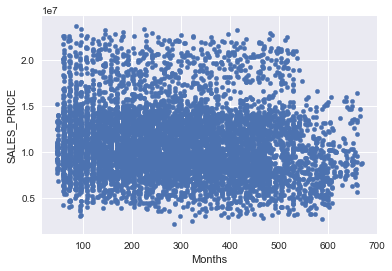

In [155]:
train.plot.scatter('Months' , 'SALES_PRICE')

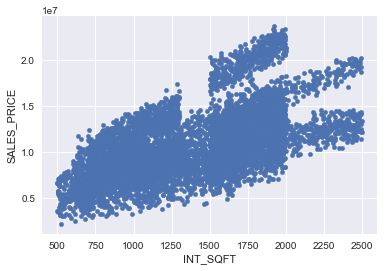

In [156]:
train.plot.scatter('INT_SQFT' , 'SALES_PRICE')

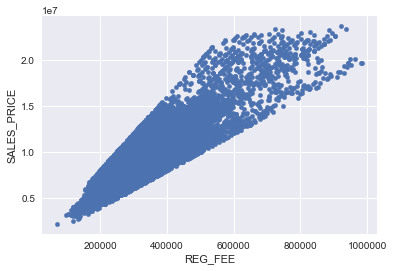

In [157]:
train.plot.scatter('REG_FEE' , 'SALES_PRICE')

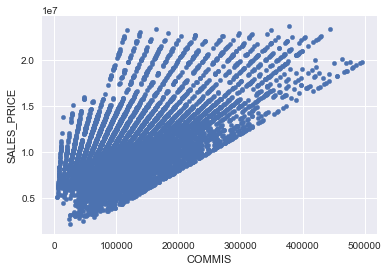

In [158]:
train.plot.scatter('COMMIS' , 'SALES_PRICE')

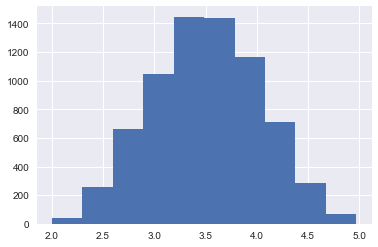

In [159]:
train['QS_OVERALL'].hist(bins = 10)

In [160]:
def scatter(group):
    plt.plot(group['COMMIS'],group['SALES_PRICE'],'o',label= group.name)

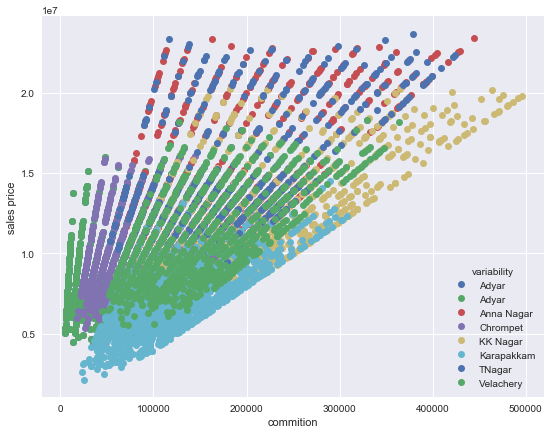

In [161]:
 plt.figure(figsize = (9,7))
 train.groupby('AREA').apply(scatter)
 plt.legend(title = 'variability')
 plt.ylabel('sales price')
 plt.xlabel('commition')

In [162]:
def scatter(group):
    plt.plot(group['Months'],group['COMMIS'],'o',label= group.name)

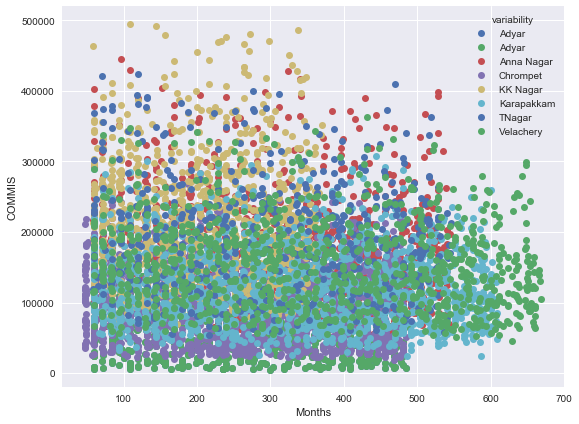

In [163]:
 plt.figure(figsize = (9,7))
 train.groupby('AREA').apply(scatter)
 plt.legend(title = 'variability')
 plt.ylabel('COMMIS')
 plt.xlabel('Months')

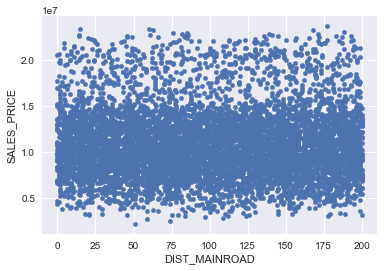

In [164]:
train.plot.scatter('DIST_MAINROAD','SALES_PRICE')

Label Encoding of Categorial Features

In [165]:
for n in ['AREA', 'SALE_COND', 'PARK_FACIL', 'BUILDTYPE','UTILITY_AVAIL', 'STREET', 'MZZONE']:
          train[n] = train[n].astype('category')
        

for n in ['AREA', 'SALE_COND', 'PARK_FACIL', 'BUILDTYPE','UTILITY_AVAIL', 'STREET', 'MZZONE']:
          test[n] = test[n].astype('category')

In [166]:
for n in ['AREA', 'SALE_COND', 'PARK_FACIL', 'BUILDTYPE','UTILITY_AVAIL', 'STREET', 'MZZONE']:
  train[n] = train[n].cat.codes

for n in ['AREA', 'SALE_COND', 'PARK_FACIL', 'BUILDTYPE','UTILITY_AVAIL', 'STREET', 'MZZONE']:
  test[n] = test[n].cat.codes

In [167]:
for n in ['AREA', 'SALE_COND', 'PARK_FACIL', 'BUILDTYPE','UTILITY_AVAIL', 'STREET', 'MZZONE']:
          train[n] = train[n].astype('object')

In [168]:
    for n in ['AREA', 'SALE_COND', 'PARK_FACIL', 'BUILDTYPE','UTILITY_AVAIL', 'STREET', 'MZZONE']:
          test[n] = test[n].astype('object')

In [169]:
train[train['N_BATHROOM'].isnull()]

,PRT_ID,AREA,INT_SQFT,Rs Per sq,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,...,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE,Unnamed: 23,Months
70,P05304,1,1589,7685.556954,2010-03-22,39,1.0,NaN,4,4,...,4,2.1,2.5,4.5,3.16,451857,85486,12212350,NaN,529
5087,P01333,2,1016,10480.236220,2012-02-08,105,1.0,NaN,3,0,...,5,3.2,4.2,2.0,3.24,330086,106479,10647920,NaN,376
6134,P01332,2,916,9658.755459,2012-02-08,173,1.0,NaN,3,3,...,4,3.4,3.5,3.0,3.30,265423,44237,8847420,NaN,446
6371,P01189,2,1035,7994.396135,2012-06-11,90,1.0,NaN,3,4,...,5,2.3,3.5,3.2,3.05,223403,24823,8274200,NaN,367
6535,P09189,1,1864,8345.987124,2007-05-03,184,2.0,NaN,5,2,...,5,3.3,3.7,4.7,3.96,575606,124455,15556920,NaN,118


In [170]:
# New Feature Sum
train['sum'] = train['COMMIS'] + train['REG_FEE'] + train['SALES_PRICE']

In [172]:
train['N_BEDROOM'].fillna(2,inplace = True)

In [173]:
train['N_BATHROOM'].fillna(1,inplace = True)

In [174]:
for n in ['AREA', 'SALE_COND', 'PARK_FACIL', 'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE']:
  train[n] = train[n].astype('int')

for n in ['AREA', 'SALE_COND', 'PARK_FACIL', 'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE']:
  test[n] = test[n].astype('int')

In [175]:
X = train[['AREA','SALE_COND','PARK_FACIL','BUILDTYPE','UTILITY_AVAIL','STREET','MZZONE','Months','DIST_MAINROAD','N_ROOM','INT_SQFT','QS_ROOMS']]
Y = test[['AREA','SALE_COND','PARK_FACIL','BUILDTYPE','UTILITY_AVAIL','STREET','MZZONE','Months','DIST_MAINROAD','N_ROOM','INT_SQFT','QS_ROOMS']]

In [176]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,train['sum'])

In [177]:
import xgboost as xgb
xgb_para = {
    
    'eta':0.05,
    'max_depth':6,
    'subsample':0.75,
    'objective':'reg:linear',
    'colsample_bytree':0.8,
    'min_child_weight':1,
    'eval_metric':'rmse',
}

In [178]:
dtraincv = xgb.DMatrix(x_train,y_train)
dtestcv = xgb.DMatrix(x_test)

In [179]:
cv_result = xgb.cv(xgb_para,
                   dtraincv,
                   num_boost_round=1000,
                   early_stopping_rounds=50,
                   verbose_eval=50,
                   show_stdv=False)
num_boost_rounds = len(cv_result)
print (num_boost_rounds)

modelcv = xgb.train(dict(xgb_para), dtraincv,num_boost_round=num_boost_rounds)

[0]	train-rmse:1.15055e+07	test-rmse:1.15054e+07
[50]	train-rmse:1.1414e+06	test-rmse:1.20411e+06
[100]	train-rmse:309258	test-rmse:434224
[150]	train-rmse:192229	test-rmse:334639
[200]	train-rmse:145797	test-rmse:297157
[250]	train-rmse:119440	test-rmse:278805
[300]	train-rmse:102319	test-rmse:268566
[350]	train-rmse:90084.5	test-rmse:262340
[400]	train-rmse:80215.4	test-rmse:258617
[450]	train-rmse:71986.1	test-rmse:255871
[500]	train-rmse:65336.1	test-rmse:254256
[550]	train-rmse:59529.9	test-rmse:253036
[600]	train-rmse:54054.2	test-rmse:252121
[650]	train-rmse:49603.1	test-rmse:251351
[700]	train-rmse:45565.7	test-rmse:250774
[750]	train-rmse:41852.7	test-rmse:250249
[800]	train-rmse:38575.7	test-rmse:249919
[850]	train-rmse:35557.7	test-rmse:249522
[900]	train-rmse:32883.7	test-rmse:249345
[950]	train-rmse:30482.9	test-rmse:249237
1000


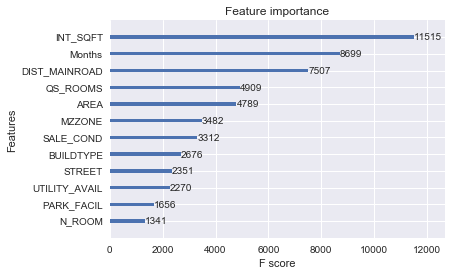

In [180]:
from xgboost import plot_importance
plot_importance(modelcv)
pyplot.show()

In [181]:
from sklearn.metrics import accuracy_score
# make predictions for test data and evaluate
y_pred = modelcv.predict(dtestcv)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 0.00%


In [182]:
dtrain = xgb.DMatrix(X,train['sum'])
dtest = xgb.DMatrix(Y)

In [131]:
cv_result = xgb.cv(xgb_para,
                   dtrain,
                   num_boost_round=1000,
                   early_stopping_rounds=50,
                   verbose_eval=50,
                   show_stdv=False)
num_boost_rounds = len(cv_result)
print (num_boost_rounds)

model = xgb.train(dict(xgb_para), dtrain,num_boost_round=num_boost_rounds)

[0]	train-rmse:1.14829e+07	test-rmse:1.14829e+07
[50]	train-rmse:1.12836e+06	test-rmse:1.17089e+06
[100]	train-rmse:316749	test-rmse:409368
[150]	train-rmse:199546	test-rmse:304305
[200]	train-rmse:154066	test-rmse:266414
[250]	train-rmse:127249	test-rmse:245799
[300]	train-rmse:110361	test-rmse:234839
[350]	train-rmse:98313.1	test-rmse:228450
[400]	train-rmse:89074.1	test-rmse:224606
[450]	train-rmse:81314.4	test-rmse:221909
[500]	train-rmse:74646.5	test-rmse:219832
[550]	train-rmse:69095.4	test-rmse:218552
[600]	train-rmse:63971.2	test-rmse:217498
[650]	train-rmse:59642.2	test-rmse:216813
[700]	train-rmse:55686.2	test-rmse:216110
[750]	train-rmse:52160.2	test-rmse:215681
[800]	train-rmse:48852.9	test-rmse:215361
[850]	train-rmse:45784.5	test-rmse:215032
[900]	train-rmse:42906.4	test-rmse:214757
[950]	train-rmse:40263.3	test-rmse:214529
1000


In [183]:
xgb_pred = model.predict(dtest)

In [184]:
xgb_pred

array([  8023513.5,  15738702. ,   8470084. , ...,  19118388. ,
        15800304. ,  13548506. ], dtype=float32)

In [185]:
xgb_pred = xgb_pred - test['COMMIS'] - test['REG_FEE']

In [ ]:
xgb_pred

In [137]:
submission = pd.DataFrame({'PRT_ID':test['PRT_ID'],'SALES_PRICE':xgb_pred})
submission.to_csv('6.csv', index = False)